<a href="https://colab.research.google.com/github/sabinnmc/bubble_watcher/blob/main/bubble_watcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Math

# creating a file path variable for reading a file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
itemList = os.listdir('/content/drive/MyDrive/Colab Notebooks/bubble_Watcher_file')
base = "/content/drive/MyDrive/Colab Notebooks/bubble_Watcher_file/"
full_path = []
for item in itemList:
  # removing a default generated file inside a folder as it is not needed
  if item != '.ipynb_checkpoints':
    location = os.path.join(base, item)
    full_path.append(location)
    print(location)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/bubble_Watcher_file/20250221ok.csv
/content/drive/MyDrive/Colab Notebooks/bubble_Watcher_file/20250221ng.csv


#reading a file
1. character encoder is 'shift JIS' (shift japanese industrial Standards) is used as these file are auto generated by device
2. encodeing = sjis is used instead of other encoder as it is best

In [ ]:
dfs = []
for item in full_path:
  df = pd.read_csv(item, encoding='sjis')
  dfs.append(df)
  print(df.head)


<bound method NDFrame.head of       検査完了時刻  検査番号  自己診断種別  ODD 0-0  ODD 0-1  ODD 0-2  ODD 0-3  ODD 0-4  \
0   14:24:16    17       0     8620     5324    14726      250    19216   
1   14:24:38    17       1    17462    21702    28324      278    17742   
2   14:25:06    18       0     8792     5634    14072      244    19614   
3   14:25:28    18       1    17326    21320    27910      230    17654   
4   14:25:57    19       0     8782     5296    14574      256    19994   
5   14:26:19    19       1    17276    21610    27476      248    17390   
6   14:26:48    20       0     8962     5542    14212      228    20138   
7   14:27:10    20       1    18690    23644    29882      236    18962   
8   14:27:38    21       0     9050     5934    14760      236    20576   
9   14:28:00    21       1    18754    23584    30292      246    19210   
10  14:28:29    22       0     9080     5736    14964      252    20872   
11  14:28:51    22       1    18286    23342    29952      262    1912

In [ ]:
print(df["ODD 0-0"].max())

18994


# creating a list of column for data analysis

In [ ]:
#column = iloc[:, ]
odd_columns = []
even_columns = []
for i in range(6):
  odd_column = [f'ODD {i}-{j}' for j in range(5)]
  # if append is used 5 element list is created as nested style
  odd_columns.extend(odd_column)
  #print(odd_column)
  even_column = [f'EVEN {i}-{j}' for j in range(5)]
  even_columns.extend(even_column)
  #print(even_column)

# concatination of odd_column followed by even_column
total_columns = odd_columns + even_columns
print((total_columns))

['ODD 0-0', 'ODD 0-1', 'ODD 0-2', 'ODD 0-3', 'ODD 0-4', 'ODD 1-0', 'ODD 1-1', 'ODD 1-2', 'ODD 1-3', 'ODD 1-4', 'ODD 2-0', 'ODD 2-1', 'ODD 2-2', 'ODD 2-3', 'ODD 2-4', 'ODD 3-0', 'ODD 3-1', 'ODD 3-2', 'ODD 3-3', 'ODD 3-4', 'ODD 4-0', 'ODD 4-1', 'ODD 4-2', 'ODD 4-3', 'ODD 4-4', 'ODD 5-0', 'ODD 5-1', 'ODD 5-2', 'ODD 5-3', 'ODD 5-4', 'EVEN 0-0', 'EVEN 0-1', 'EVEN 0-2', 'EVEN 0-3', 'EVEN 0-4', 'EVEN 1-0', 'EVEN 1-1', 'EVEN 1-2', 'EVEN 1-3', 'EVEN 1-4', 'EVEN 2-0', 'EVEN 2-1', 'EVEN 2-2', 'EVEN 2-3', 'EVEN 2-4', 'EVEN 3-0', 'EVEN 3-1', 'EVEN 3-2', 'EVEN 3-3', 'EVEN 3-4', 'EVEN 4-0', 'EVEN 4-1', 'EVEN 4-2', 'EVEN 4-3', 'EVEN 4-4', 'EVEN 5-0', 'EVEN 5-1', 'EVEN 5-2', 'EVEN 5-3', 'EVEN 5-4']


# selecting a required column only

['検査完了時刻', '検査番号', '自己診断種別', 'ODD 0-0', 'ODD 0-1', 'ODD 0-2', 'ODD 0-3', 'ODD 0-4', 'ODD 1-0', 'ODD 1-1', 'ODD 1-2', 'ODD 1-3', 'ODD 1-4', 'ODD 2-0', 'ODD 2-1', 'ODD 2-2', 'ODD 2-3', 'ODD 2-4', 'ODD 3-0', 'ODD 3-1', 'ODD 3-2', 'ODD 3-3', 'ODD 3-4', 'ODD 4-0', 'ODD 4-1', 'ODD 4-2', 'ODD 4-3', 'ODD 4-4', 'ODD 5-0', 'ODD 5-1', 'ODD 5-2', 'ODD 5-3', 'ODD 5-4', 'ODD 6-0', 'ODD 6-1', 'ODD 6-2', 'ODD 6-3', 'ODD 6-4', 'ODD 7-0', 'ODD 7-1', 'ODD 7-2', 'ODD 7-3', 'ODD 7-4', 'ODD 8-0', 'ODD 8-1', 'ODD 8-2', 'ODD 8-3', 'ODD 8-4', 'ODD 9-0', 'ODD 9-1', 'ODD 9-2', 'ODD 9-3', 'ODD 9-4', 'ODD 10-0', 'ODD 10-1', 'ODD 10-2', 'ODD 10-3', 'ODD 10-4', 'ODD 11-0', 'ODD 11-1', 'ODD 11-2', 'ODD 11-3', 'ODD 11-4', 'EVEN 0-0', 'EVEN 0-1', 'EVEN 0-2', 'EVEN 0-3', 'EVEN 0-4', 'EVEN 1-0', 'EVEN 1-1', 'EVEN 1-2', 'EVEN 1-3', 'EVEN 1-4', 'EVEN 2-0', 'EVEN 2-1', 'EVEN 2-2', 'EVEN 2-3', 'EVEN 2-4', 'EVEN 3-0', 'EVEN 3-1', 'EVEN 3-2', 'EVEN 3-3', 'EVEN 3-4', 'EVEN 4-0', 'EVEN 4-1', 'EVEN 4-2', 'EVEN 4-3', 'EVEN 4-4', '

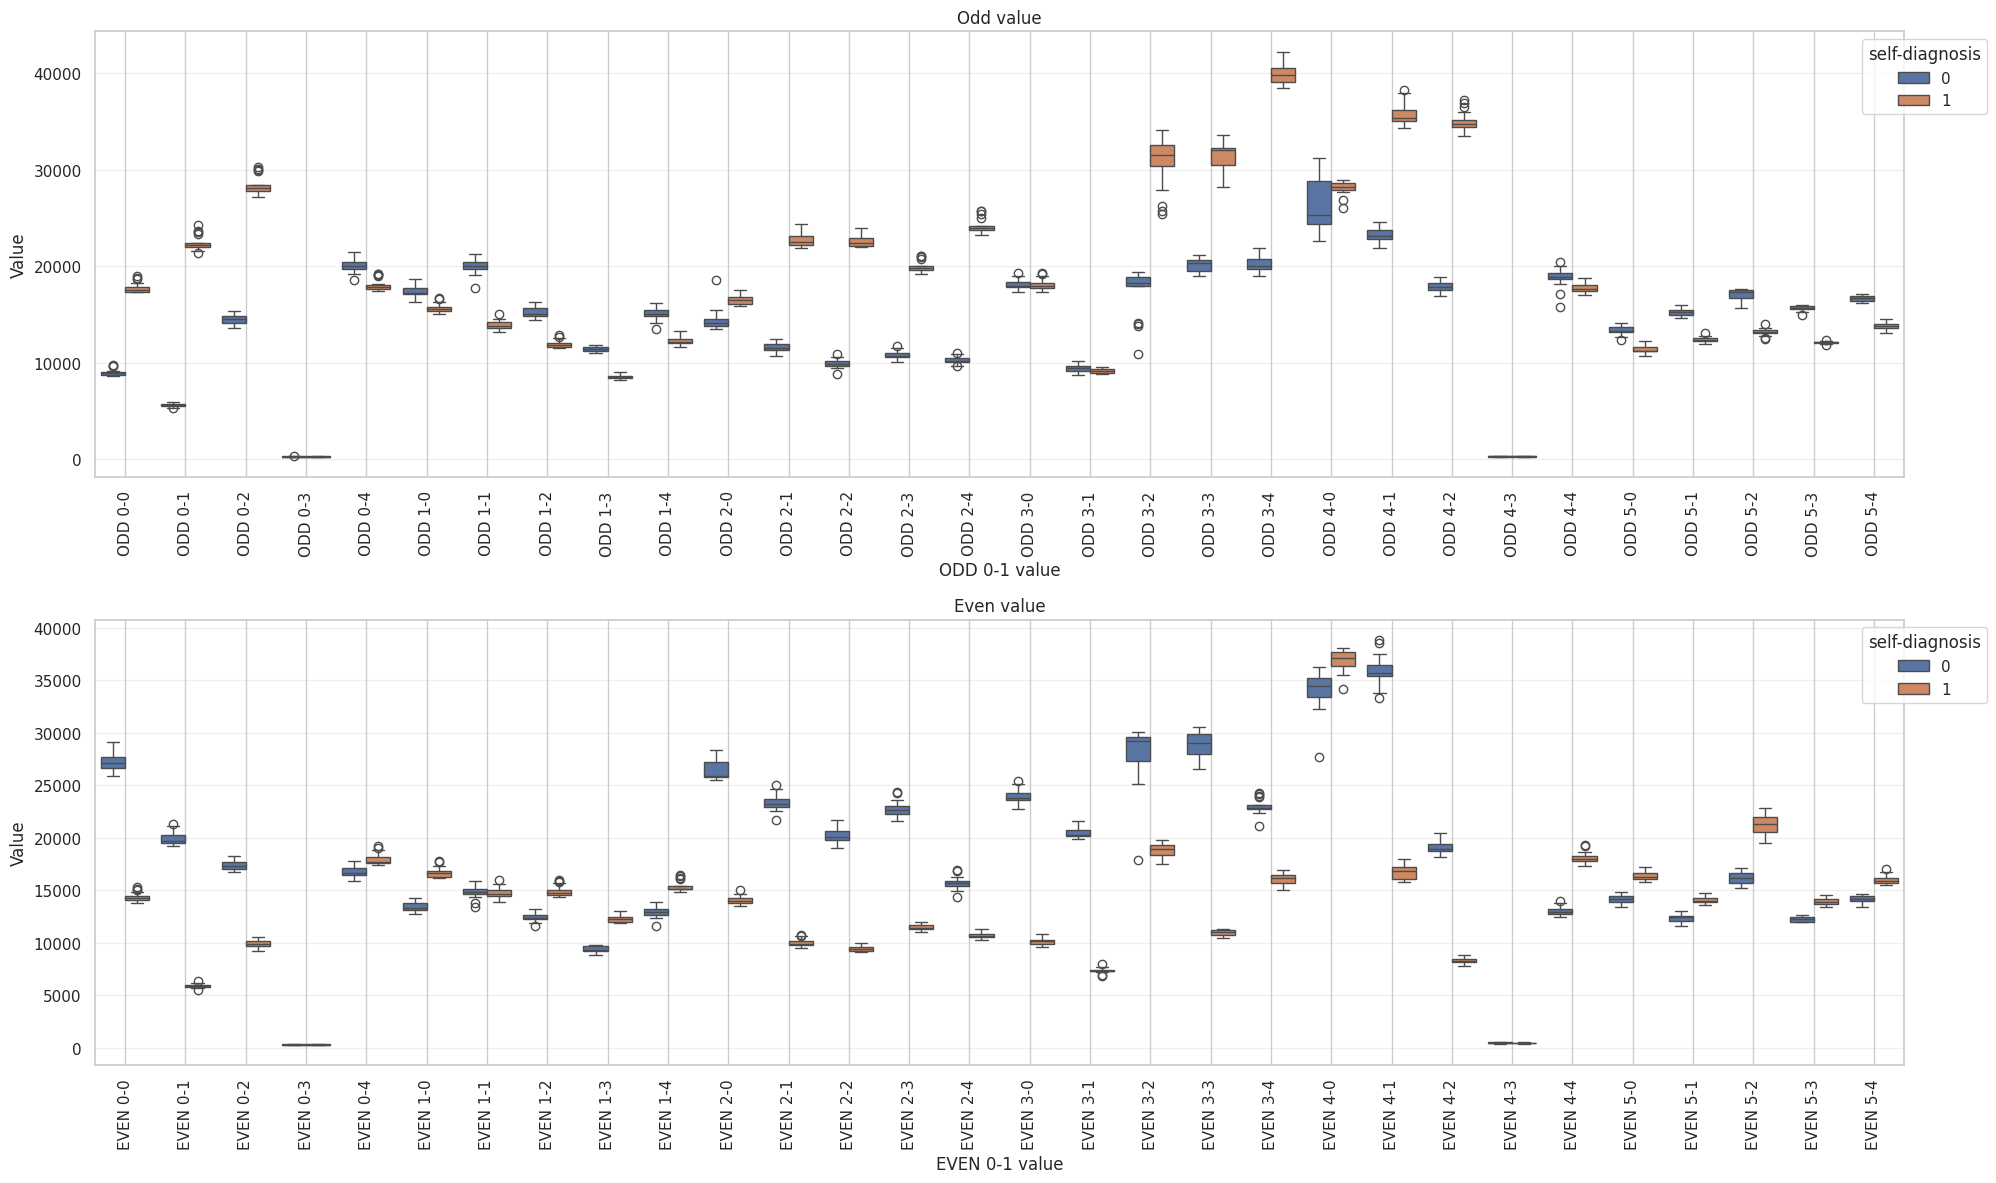

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# set seaborn theme
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(2,1,figsize=(20, 12), )

# loading csv file
file_path = "/content/drive/MyDrive/Colab Notebooks/bubble_Watcher_file/20250221ok.csv"
df = pd.read_csv(file_path, encoding = "sjis")
print(df.columns.tolist())


 # stacking column name
odd_columns = []
even_columns = []
for i in range(6):
  odd_column = [f'ODD {i}-{j}' for j in range(5)]
  odd_columns.extend(odd_column)
  even_column = [f'EVEN {i}-{j}'for j in range(5)]
  even_columns.extend(even_column)

total_columns = odd_columns + even_columns
print(len(total_columns))
# checking unique value in "自己診断種別"
print("unique value inside 自己診断種別", df["自己診断種別"].unique())

#converting data into just two column for easy analysis
# "自己診断種別" act as identifier for more division inside data
df_melted_odd = df[odd_columns + ["自己診断種別"]].melt(id_vars ="自己診断種別", var_name="header", value_name="value")
"""____________________________________________________________________________________________________________
# for separting data  wheather self-diagnosis is true or false
df_melted_0 = df_melted[df_melted["自己診断種別"] == 1]
"""
sns.boxplot(
    data =  df_melted_odd,
    y = "value",
    x = "header",
    hue = "自己診断種別", # split by 0 or 1 , paired boxes
    #hue ="ODD 0-0", #orient ="v", # vertical orientation plot
    #gap = 0.1, # distance between the plot
    #whis=[0, 100],  # minimum/maximum
    ax = ax[0],
    #palette = "vlag",
    dodge = True  # ensuring boxes are side by side
)
#tweak the visual presentation
ax[0].xaxis.grid(True)
ax[0].set_title("Odd value")
ax[0].set_xlabel("ODD 0-1 value")
ax[0].set_ylabel("Value")
#sns.despine(trim = True, left = True)
# converting x axis label vertical for readibility purpose
ax[0].tick_params(axis = "x", rotation = 90)
ax[0].legend(title="self-diagnosis", bbox_to_anchor =(1.05, 1))
ax[0].grid(True, axis="y", alpha = 0.3)

#______________________________________________________________________________________________________
# Even plot if data
df_melted_even = df[even_columns + ["自己診断種別"]].melt(id_vars ="自己診断種別", var_name="header", value_name="value")
sns.boxplot(df_melted_even,
            x = "header",
            y = "value",
            hue = "自己診断種別",
            dodge=True,
            ax = ax[1]
            )
ax[1].xaxis.grid(True)
ax[1].set_title("Even value")
ax[1].set_xlabel("EVEN 0-1 value")
ax[1].set_ylabel("Value")
#sns.despine(trim = True, left = True)
# converting x axis label vertical for readibility purpose
ax[1].tick_params(axis = "x", rotation = 90)
#ax[0].legend(title="self-diagnosis", bbox_to_anchor =(1.05, 1))
ax[1].grid(True, axis="y", alpha = 0.3)
ax[1].legend(title="self-diagnosis", bbox_to_anchor =(1.05, 1))
plt.tight_layout()
plt.show()

# creating comparison of data in **"<font color='red'>`ODD 1-0`</font>"** to **"<font color='red'>`ODD 1-4`</font>"** from both sheet of file **"20250221ng.csv"** and **"20250221ok.csv"**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
target_columns = []
for i in range(5):
  even_column = [f"EVEN 1-{i}"]
  target_columns.extend(even_column)
print(target_columns)

ok_file_path = "/content/drive/MyDrive/Colab Notebooks/bubble_Watcher_file/20250221ok.csv"
ng_file_path = "/content/drive/MyDrive/Colab Notebooks/bubble_Watcher_file/20250221ng.csv"
ok_df = pd.read_csv(ok_file_path, encoding = "sjis")
ng_df = pd.read_csv(ng_file_path, encoding = "sjis")
print("\n",ok_df.head()[target_columns])
print("\n",ng_df.head()[target_columns])

# melting a ok_df file into melted state
df_melted_odd = ok_df[target_columns + ["自己診断種別"]].melt(id_vars ="自己診断種別", var_name="header", value_name="value")

# calculating a  unique value from "検査番号" column from "ng_df"
unique_pair = ng_df["検査番号"].nunique()
print(f"number of unique value inside 20250221ng.csv : {unique_pair}")
start_idx = 0
for counter in range(0, unique_pair, 1):
  #slicing with start index 1 pair at a time

  """
  # first separting two piece at time before melting data in 2 column style
  # melt df_2pair_extraction data into 2 column style (it is necessary for easy data access)
  # then plotting  scatter plot make sure "hue" is turned inorder to differentiate controlling index
  """
  #df_2pair_extraction = ng_df[target_columns + ["自己診断種別"]].head(2)
  df_2pair_extraction = ng_df[target_columns + ["自己診断種別"] + ["検査番号"]].iloc[start_idx:start_idx + 2]
  start_idx += 2
  #print(df_2pair_extraction)
  df_melted_even = df_2pair_extraction[target_columns + ["自己診断種別"]].melt(id_vars ="自己診断種別", var_name="header", value_name="value")

  # setting theme
  #sns.set_theme(style="whitegrid")
  sns.set_style("ticks")
  fig, ax =plt.subplots(figsize=(20,12))

  sns.boxplot(
      data =  df_melted_odd,
      y = "value",
      x = "header",
      hue = "自己診断種別", # split by 0 or 1 , paired boxes
      #hue ="ODD 0-0", #orient ="v", # vertical orientation plot
      #gap = 0.1, # distance between the plot
      #whis=[0, 100],  # minimum/maximum
      #palette = "vlag",
      ax=ax,
      dodge = True  # ensuring boxes are side by side
  )

  sns.scatterplot(
      data = df_melted_even,
      y = "value",
      x = "header",
      s = 100,            # this parameter is drived from matlabplot.pyplot as plt
      hue = "自己診断種別",
      ax = ax,
  )

  ax.set_title("Odd value")
  ax.set_xlabel("ODD 0-1 value")
  ax.set_ylabel("Value")
  ax.set_ylim(0, 25000)
  #sns.despine(trim = True, left = True)
  ax.legend(title="self-diagnosis", bbox_to_anchor =(1.05, 1))
  # gca =  get current axes object
  ax.grid(True, axis="both", alpha=0.7)
  #print("Grid status:", ax.yaxis.grid_on)
  plt.tight_layout()

  # checking for "検査番号" known as inspection number which is unique for each pair and clearly identified
  inspection_no = df_2pair_extraction["検査番号"].iloc[0]
  print(f"\n inspection number : {inspection_no}")
  plt.savefig(f"/content/drive/MyDrive/Colab Notebooks/bubble_Watcher_file/even pic/inspection number- {inspection_no}_E.png")
  #plt.show()
  plt.close()   # free up memory after action"

['ODD 1-0', 'ODD 1-1', 'ODD 1-2', 'ODD 1-3', 'ODD 1-4']
